In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("../../../data/housingprice.csv")
df.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3.0,1.5,1341.0,7912.0,1.5,1.0,1.0,3.0,1341.0,1.0,1955.0,2115.0,313111.0
1,5.0,2.5,3651.0,9151.0,2.0,1.0,4.0,5.0,3371.0,281.0,1921.0,1.0,2384111.0
2,3.0,2.0,1931.0,11947.0,1.0,1.0,1.0,4.0,1931.0,1.0,1966.0,1.0,342111.0


In [3]:
df.isnull().sum()

bedrooms         4579
bathrooms        4579
sqft_living      4579
sqft_lot         4579
floors           4579
waterfront       4579
view             4579
condition        4579
sqft_above       4579
sqft_basement    4579
yr_built         4579
yr_renovated     4579
price               0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3.0,1.50,1341.0,7912.0,1.5,1.0,1.0,3.0,1341.0,1.0,1955.0,2115.0,3.131110e+05
1,5.0,2.50,3651.0,9151.0,2.0,1.0,4.0,5.0,3371.0,281.0,1921.0,1.0,2.384111e+06
2,3.0,2.00,1931.0,11947.0,1.0,1.0,1.0,4.0,1931.0,1.0,1966.0,1.0,3.421110e+05
3,3.0,2.25,2111.0,8131.0,1.0,1.0,1.0,4.0,1111.0,1111.0,1963.0,1.0,4.211110e+05
4,4.0,2.50,1941.0,11511.0,1.0,1.0,1.0,4.0,1141.0,811.0,1976.0,1992.0,5.511110e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1511.0,6361.0,1.0,1.0,1.0,4.0,1511.0,1.0,1954.0,1979.0,3.181667e+05
4596,3.0,2.50,1461.0,7573.0,2.0,1.0,1.0,3.0,1461.0,1.0,1983.0,2119.0,5.343333e+05
4597,3.0,2.50,3111.0,7114.0,2.0,1.0,1.0,3.0,3111.0,1.0,2119.0,1.0,4.169142e+05
4598,4.0,2.00,2191.0,6631.0,1.0,1.0,1.0,3.0,1171.0,1121.0,1974.0,1.0,2.134110e+05


In [6]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
price            0
dtype: int64

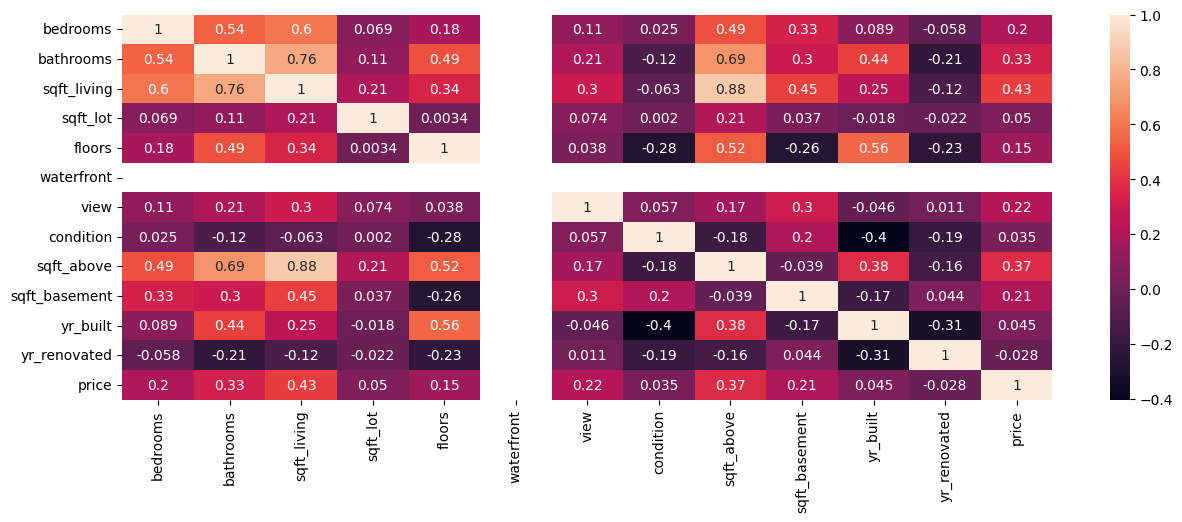

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
x=df.iloc[:,:-1]
y=df["price"]
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [27]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

## Linear Regression 

In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.score(x_test,y_test)*100

3.2439556447371842

In [15]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

988561640769.1522
217151.724592866
994264.371668397


In [16]:
lr.coef_

array([-6.23809135e+04,  1.44077487e+04,  9.22462849e+05, -2.05325431e+04,
        4.44456108e+04, -9.02218744e-10,  4.61873104e+04,  3.18954678e+04,
       -5.79861572e+05, -3.06034780e+05, -4.48808210e+04,  1.94334849e+04])

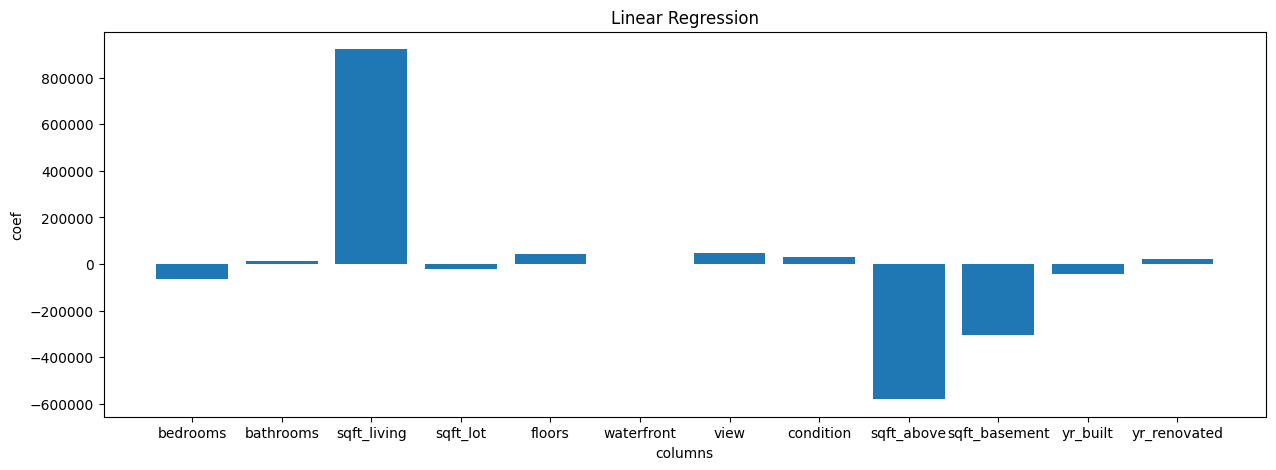

In [17]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [18]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Lasso (L1) (used for feature selection)

In [19]:
la=Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

F:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+14, tolerance: 5.335e+10
  model = cd_fast.enet_coordinate_descent(


3.2585849820880752

In [20]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

988412172052.946
217041.25067297713
994189.2033476053


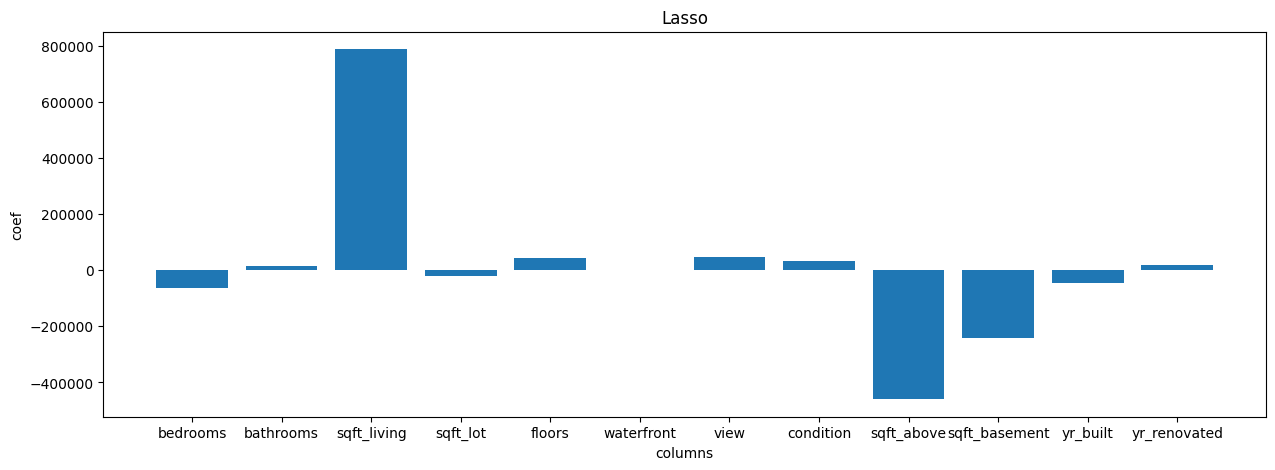

In [21]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Ridge (L2) (also used for feature selection)

In [22]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

3.2690772961017744

In [23]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

988304971523.7599
217176.65557173322
994135.2883404552


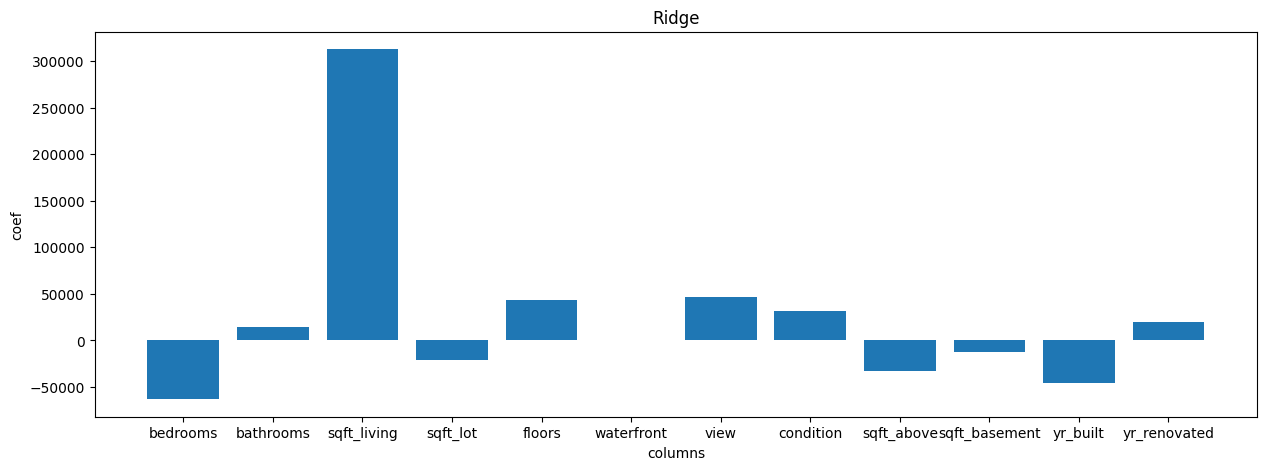

In [24]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

## Comparing LinearRegreession,Laso and Ridge

In [25]:
data=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Laso":la.coef_,"Ridge":ri.coef_})
data

,col_name,LinearRegression,Laso,Ridge
0,bedrooms,-6.238091e+04,-62626.045876,-63174.094117
1,bathrooms,1.440775e+04,14594.028365,14702.521861
2,sqft_living,9.224628e+05,788836.672352,312900.849627
3,sqft_lot,-2.053254e+04,-20768.238204,-21347.373716
4,floors,4.444561e+04,44101.450690,43237.826263
5,waterfront,-9.022187e-10,0.000000,0.000000
6,view,4.618731e+04,46104.370375,45987.583731
7,condition,3.189547e+04,31853.865781,31564.428069
8,sqft_above,-5.798616e+05,-459905.929627,-32719.986004
9,sqft_basement,-3.060348e+05,-241743.213110,-12580.207075
